In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding a categorical feature to the dataset
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

X = iris_df.drop('target', axis=1)

# 1. Partitioning Approach

# K-Mode

# A) Euclidean Distance

In [3]:
class KModeED:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids
        self.centroids = X.sample(self.k).values

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            print(f"Centroids after {_+1} iterations: \n{new_centroids}")

            self.centroids = new_centroids
            
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _assign_clusters(self, X):
        distances = self._categorical_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, clusters):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            mode = cluster_points.mode().iloc[0].values
            new_centroids[i] = mode
        return new_centroids

    def _categorical_distances(self, X, centroids):
        distances = np.zeros((X.shape[0], centroids.shape[0]))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.sum(X != centroid, axis=1)
        return distances

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            cluster_mode = cluster_points.mode().iloc[0]
            cluster_mode.plot(kind='bar', color='skyblue')
            plt.title(f'Cluster {i} Mode')
            plt.xticks(rotation=45)
            plt.show()
    
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)

Centroids after 1 iterations: 
[[6.3 3.  5.1 1.5]
 [5.5 2.6 4.4 1.2]
 [5.  3.4 1.4 0.2]]
Centroids after 2 iterations: 
[[6.3 3.  5.1 1.5]
 [5.5 2.6 4.  1.2]
 [5.  3.4 1.4 0.2]]


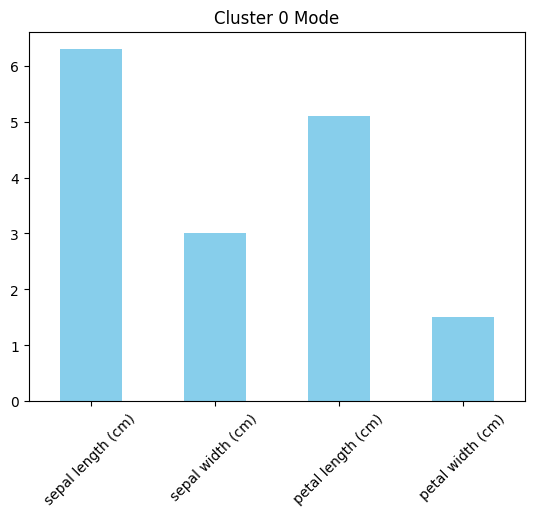

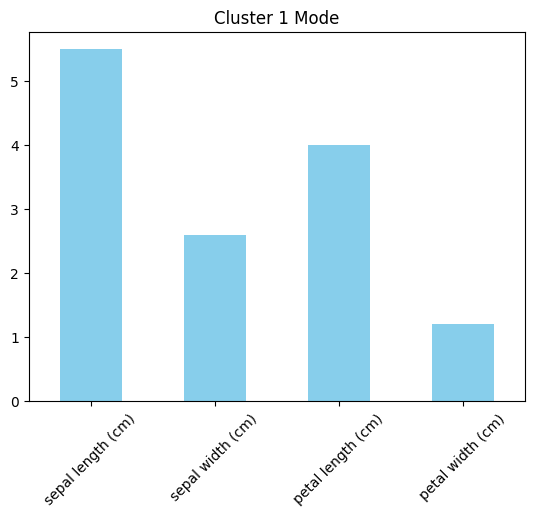

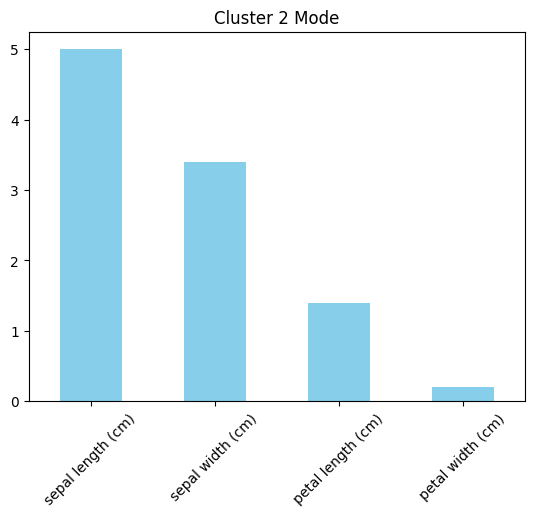

Silhouette Score: 0.09860486911027867
Labels:
[2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 0 0 2 0 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 1
 2 0 2 2 0 2 2 0 0 2 2 2 2 0 0 0 1 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 1 1 0 0 2 0 0 0 1 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0]


In [4]:
kmodeED = KModeED(k=3)
labels = kmodeED.fit(X)

print("Labels:")
print(labels)

# B) Manhattan Distance

In [5]:
class KModeMD:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids
        self.centroids = X.sample(self.k).values

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            print(f"Centroids after {_+1} iterations: \n{new_centroids}")

            self.centroids = new_centroids
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _assign_clusters(self, X):
        distances = self._manhattan_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, clusters):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            mode = cluster_points.mode().iloc[0].values
            new_centroids[i] = mode
        return new_centroids

    def _manhattan_distances(self, X, centroids):
        distances = np.zeros((X.shape[0], centroids.shape[0]))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.sum(np.abs(X - centroid), axis=1)
        return distances

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            cluster_mode = cluster_points.mode().iloc[0]
            cluster_mode.plot(kind='bar', color='skyblue')
            plt.title(f'Cluster {i} Mode')
            plt.xticks(rotation=45)
            plt.show()
            
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)

Centroids after 1 iterations: 
[[5.6 3.  4.5 1.3]
 [6.7 3.  5.1 2.3]
 [5.  3.4 1.4 0.2]]
Centroids after 2 iterations: 
[[5.6 3.  4.5 1.3]
 [6.7 3.  5.1 1.8]
 [5.  3.4 1.4 0.2]]
Centroids after 3 iterations: 
[[5.6 2.9 4.5 1.3]
 [6.3 3.  5.1 1.8]
 [5.  3.4 1.4 0.2]]


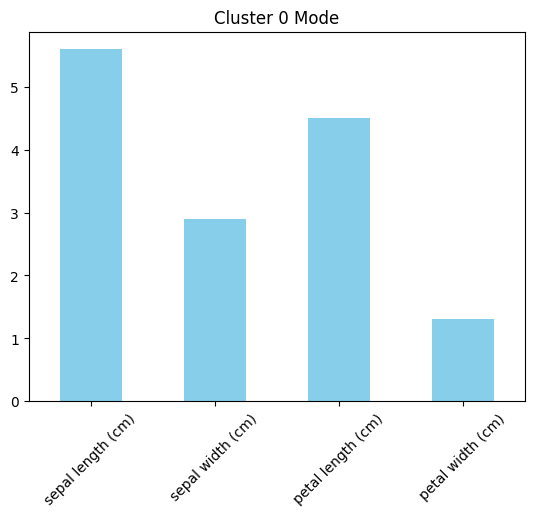

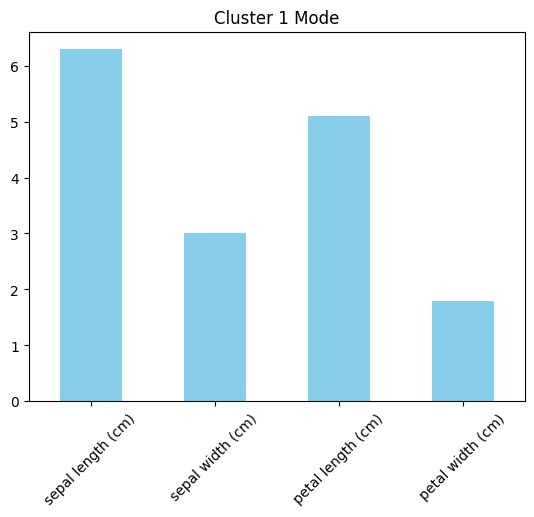

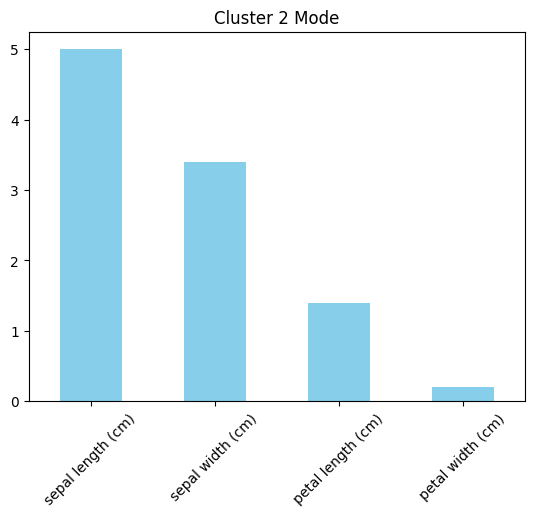

Silhouette Score: 0.518761329236732
Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [6]:
kmodeMD = KModeMD(k=3)
labels = kmodeMD.fit(X)

print("Labels:")
print(labels)


# C) Maximum Norm (Chebyshev Distance)

In [7]:
class KModeChebyshev:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids
        self.centroids = X.sample(self.k).values

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            print(f"Centroids after {_+1} iterations: \n{new_centroids}")

            self.centroids = new_centroids
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _assign_clusters(self, X):
        distances = self._chebyshev_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, clusters):
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            mode = cluster_points.mode().iloc[0].values
            new_centroids[i] = mode
        return new_centroids

    def _chebyshev_distances(self, X, centroids):
        distances = np.zeros((X.shape[0], centroids.shape[0]))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.max(np.abs(X - centroid), axis=1)
        return distances

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            cluster_mode = cluster_points.mode().iloc[0]
            cluster_mode.plot(kind='bar', color='skyblue')
            plt.title(f'Cluster {i} Mode')
            plt.xticks(rotation=45)
            plt.show()
            
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)


Centroids after 1 iterations: 
[[5.  3.4 1.4 0.2]
 [5.5 3.  4.  1.3]
 [6.3 3.  5.1 1.8]]
Centroids after 2 iterations: 
[[5.  3.4 1.4 0.2]
 [5.5 3.  4.5 1.3]
 [6.3 3.  5.1 1.8]]
Centroids after 3 iterations: 
[[5.  3.4 1.4 0.2]
 [5.6 2.8 4.5 1.3]
 [6.3 3.  5.1 1.8]]
Centroids after 4 iterations: 
[[5.  3.4 1.4 0.2]
 [5.6 3.  4.5 1.3]
 [6.3 3.  5.1 1.8]]


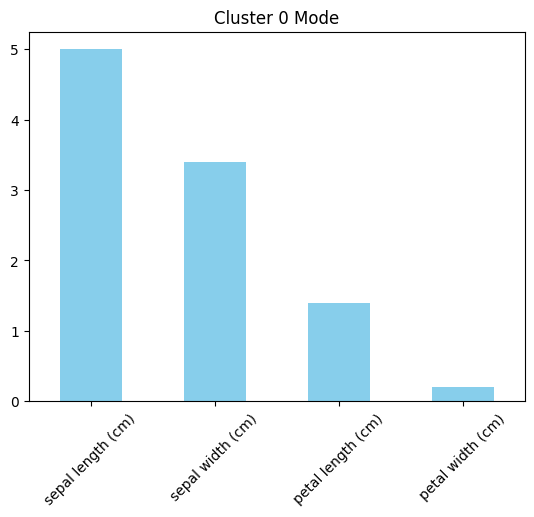

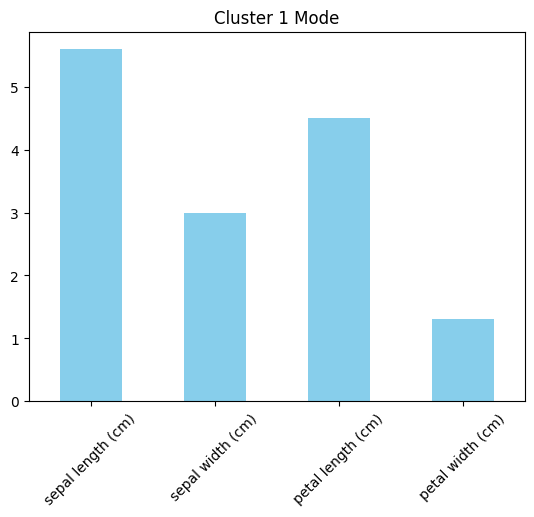

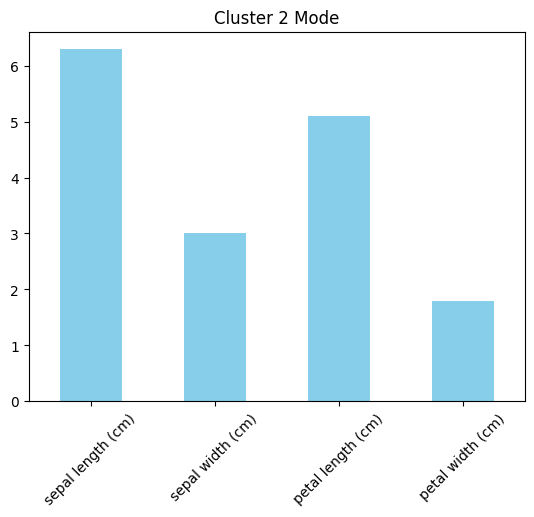

Silhouette Score: 0.5143612663442356
Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 1
 2 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
kmodeMN = KModeChebyshev(k=3)
labels = kmodeMN.fit(X)

print("Labels:")
print(labels)

# K-Means++

# D) Mahalanobis Distance

In [9]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import mahalanobis

In [10]:
class KMeansMahalanobis:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids using K-Means++
        self.centroids = self._kmeans_plusplus_init(X)

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
            
            print(f"Centroids after {_+1} iterations: \n{new_centroids}")
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _kmeans_plusplus_init(self, X):
        centroids = []
        centroids.append(X.sample().values[0])

        for _ in range(1, self.k):
            distances = np.array([min([np.linalg.norm(point-centroid)**2 for centroid in centroids]) for point in X.values])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X.iloc[i].values)

        return np.array(centroids)

    def _assign_clusters(self, X):
        cov_matrix = np.cov(X.values.T)
        clusters = []
        for point in X.values:
            cluster_distances = [mahalanobis(point, centroid, np.linalg.inv(cov_matrix)) for centroid in self.centroids]
            clusters.append(np.argmin(cluster_distances))
        return np.array(clusters)

    def _update_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            centroid = np.mean(cluster_points.values, axis=0)
            new_centroids.append(centroid)
        return np.array(new_centroids)

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i}')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Centroids')
        plt.title('K-Means Clustering with Mahalanobis Distance')
        plt.legend()
        plt.show()
        
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)

Centroids after 1 iterations: 
[[6.06582278 3.13417722 3.68860759 1.10759494]
 [5.23125    2.84583333 3.25208333 0.94583333]
 [6.35652174 3.23478261 5.05217391 2.04347826]]
Centroids after 2 iterations: 
[[6.05074627 3.19850746 3.48507463 1.01791045]
 [5.32727273 2.86       3.35090909 0.96363636]
 [6.36071429 3.10714286 5.21071429 2.09642857]]
Centroids after 3 iterations: 
[[6.03442623 3.23934426 3.35409836 0.95409836]
 [5.35789474 2.86140351 3.4        0.98070175]
 [6.34375    3.059375   5.165625   2.05625   ]]
Centroids after 4 iterations: 
[[6.04561404 3.28070175 3.31578947 0.94035088]
 [5.38833333 2.84666667 3.43       0.98666667]
 [6.32121212 3.05454545 5.11818182 2.03333333]]
Centroids after 5 iterations: 
[[6.02982456 3.30877193 3.27894737 0.92982456]
 [5.38965517 2.82413793 3.40862069 0.96551724]
 [6.29142857 3.03428571 5.11714286 2.02571429]]
Centroids after 6 iterations: 
[[6.04545455 3.34545455 3.28727273 0.93090909]
 [5.39666667 2.80666667 3.39666667 0.96333333]
 [6.291428

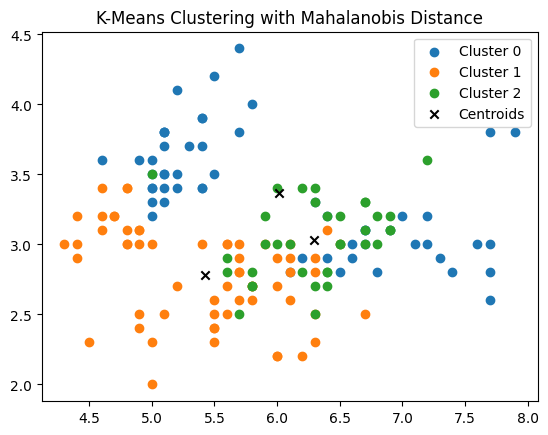

Silhouette Score: 0.027716821282283515
Labels:
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 1 1 2 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 2 1 1 2 0 1 1 1 1 2 0 1 1
 0 0 0 0 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 0 1 1 2 2 0 1 2 0 1 0 1 2 2
 2 2 2 2 2 1 0 0 1 2 2 0 2 2 0 2 2 2 0 0 0 2 1 1 0 2 1 2 2 2 2 2 2 2 2 2 2
 2 1]


In [11]:
kmeansMaha = KMeansMahalanobis(k=3)
labels = kmeansMaha.fit(X)
print("Labels:")
print(labels)

# E) Inner Product Space

In [12]:
class KMeansInnerProduct:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids using K-Means++
        self.centroids = self._kmeans_plusplus_init(X)

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
            
            print(f"Centroids after {_+1} iterations: \n{new_centroids}")
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _kmeans_plusplus_init(self, X):
        centroids = []
        centroids.append(X.sample().values[0])

        for _ in range(1, self.k):
            distances = np.array([min([np.inner(point-centroid, point-centroid) for centroid in centroids]) for point in X.values])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X.iloc[i].values)

        return np.array(centroids)

    def _assign_clusters(self, X):
        clusters = []
        for point in X.values:
            cluster_distances = [np.inner(point-centroid, point-centroid) for centroid in self.centroids]
            clusters.append(np.argmin(cluster_distances))
        return np.array(clusters)

    def _update_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            centroid = np.mean(cluster_points.values, axis=0)
            new_centroids.append(centroid)
        return np.array(new_centroids)

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i}')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Centroids')
        plt.title('K-Means Clustering with Inner Product Space Distance')
        plt.legend()
        plt.show()
        
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)


Centroids after 1 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.64727273 2.99818182 5.49090909 1.96909091]
 [5.79111111 2.71777778 4.19111111 1.31777778]]
Centroids after 2 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.69215686 3.01176471 5.54117647 1.98823529]
 [5.81428571 2.72653061 4.24489796 1.35102041]]
Centroids after 3 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.76956522 3.03695652 5.6        2.00869565]
 [5.82962963 2.73148148 4.31481481 1.39259259]]
Centroids after 4 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.80232558 3.04418605 5.64883721 2.03023256]
 [5.85438596 2.74210526 4.34561404 1.40877193]]
Centroids after 5 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.8275     3.07       5.7        2.0625    ]
 [5.885      2.74       4.37666667 1.41833333]]
Centroids after 6 iterations: 
[[5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.883606

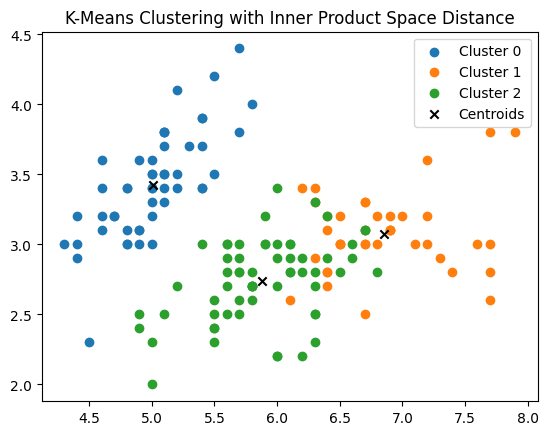

Silhouette Score: 0.551191604619592
Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [13]:
kmeansIP = KMeansInnerProduct(k = 3)
labels = kmeansIP.fit(X)
print("Labels:")
print(labels)

# F) Hamming Distance

In [14]:
class KMeansHamming:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids using K-Means++
        self.centroids = self._kmeans_plusplus_init(X)

        for _ in range(self.max_iters):
            # Assign data points to clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Check for convergence
            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
            
            print(f"Centroids after {_+1} Iteration: \n{new_centroids}")
            
        # Plot clusters after convergence
        self._plot_clusters(X, clusters, self.centroids)
        
        # Calculate silhouette score
        silhouette = self.silhouette_score(X, clusters)
        print(f"Silhouette Score: {silhouette}")

        return clusters

    def _kmeans_plusplus_init(self, X):
        centroids = []
        centroids.append(X.sample().values[0])

        for _ in range(1, self.k):
            distances = np.array([min([self._hamming_distance(point, centroid) for centroid in centroids]) for point in X.values])
            probabilities = distances / distances.sum()
            cumulative_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X.iloc[i].values)

        return np.array(centroids)

    def _assign_clusters(self, X):
        clusters = []
        for point in X.values:
            cluster_distances = [self._hamming_distance(point, centroid) for centroid in self.centroids]
            clusters.append(np.argmin(cluster_distances))
        return np.array(clusters)

    def _update_centroids(self, X, clusters):
        new_centroids = []
        for i in range(self.k):
            cluster_points = X.iloc[clusters == i]
            centroid = cluster_points.mode().iloc[0]  # Mode for Hamming distance
            new_centroids.append(centroid)
        return np.array(new_centroids)

    def _hamming_distance(self, x, y):
        return np.sum(x != y)

    def _plot_clusters(self, X, labels, cluster_centers): 
        plt.figure()
        for i in range(self.k):
            cluster_points = X.iloc[labels == i]
            plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i}')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Centroids')
        plt.title('K-Means Clustering with Hamming Distance')
        plt.legend()
        plt.show()
        
    def silhouette_score(self, X, clusters):
        return silhouette_score(X, clusters)

Centroids after 1 Iteration: 
[[5.  2.8 1.4 0.2]
 [5.1 3.1 1.5 0.2]
 [6.5 3.  4.2 2.1]]
Centroids after 2 Iteration: 
[[5.  2.8 1.4 0.2]
 [5.1 3.1 1.5 0.2]
 [6.5 3.  4.2 1.8]]


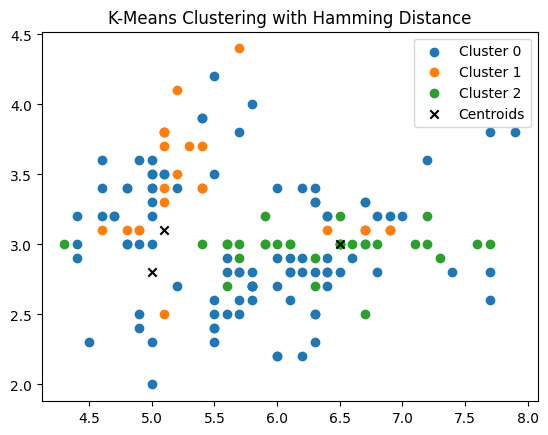

Silhouette Score: -0.13432070923734
Labels:
[0 0 0 1 0 0 0 0 0 1 1 0 0 2 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 1 2 0 0 0 2 0 0 0
 0 2 0 2 0 0 0 0 0 0 2 0 1 0 2 0 0 2 0 0 2 2 2 0 1 0 0 0 2 2 2 2 0 2 2 0 2
 0 2 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 1 2 1 1 1 0 0 0 2 0 2
 0 2]


In [15]:
kmeansHD = KMeansHamming(k = 3)
labels = kmeansHD.fit(X)
print("Labels:")
print(labels)

# Elbow-Method

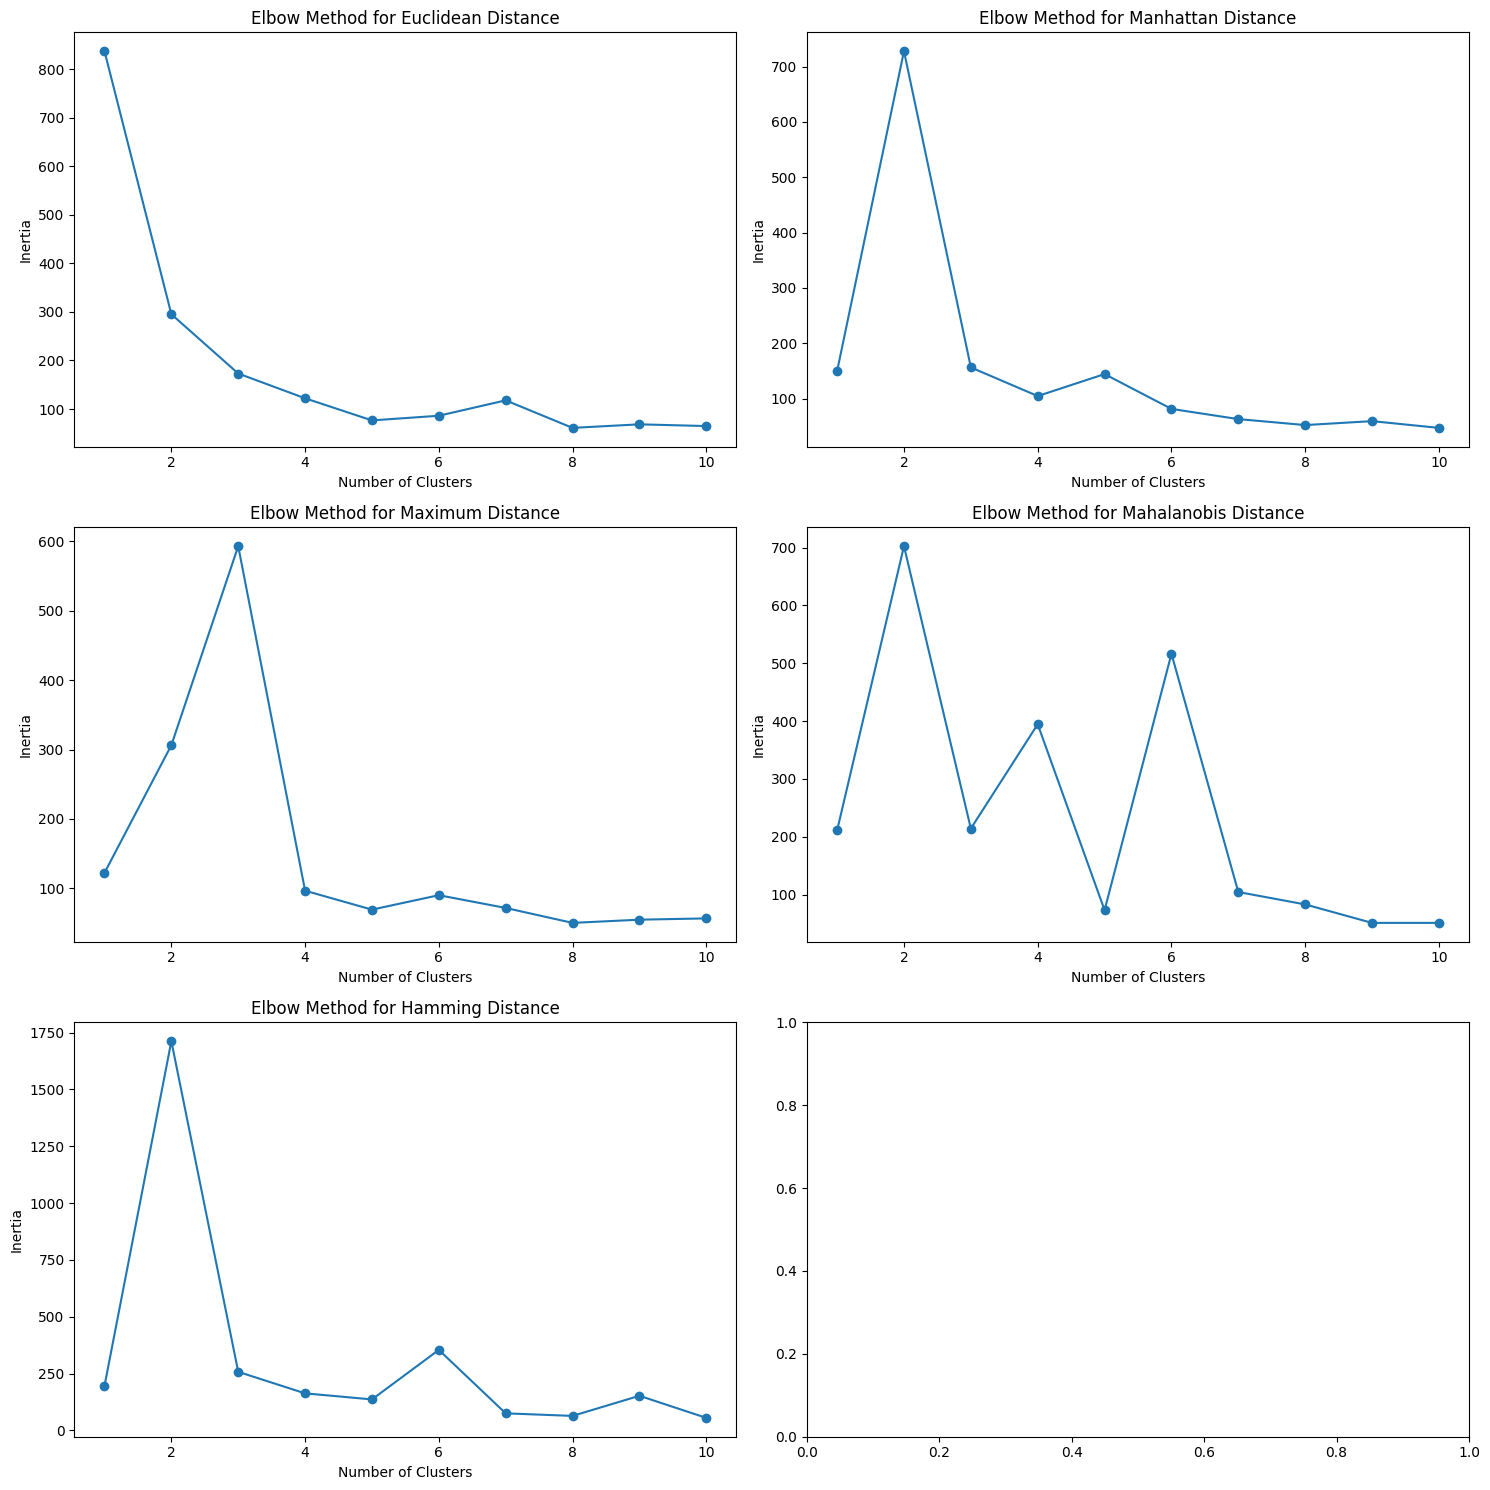

In [16]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def distance_matrix(X, centroids, metric):
    if metric == 'euclidean':
        return cdist(X, centroids, metric='euclidean')
    elif metric == 'manhattan':
        return cdist(X, centroids, metric='cityblock')
    elif metric == 'maximum':
        return cdist(X, centroids, metric='chebyshev')
    elif metric == 'mahalanobis':
        return cdist(X, centroids, metric='mahalanobis', VI=np.linalg.inv(np.cov(X.T)))
    elif metric == 'inner_product':
        return X @ centroids.T
    elif metric == 'hamming':
        return cdist(X, centroids, metric='hamming')

def kmeans_plusplus(X, k, metric):
    X_reset_index = X.reset_index(drop=True)  # Reset index
    centroids = [X_reset_index.iloc[np.random.choice(X_reset_index.shape[0])]]
    for _ in range(1, k):
        distances = distance_matrix(X_reset_index, np.array(centroids), metric)
        min_distances = np.min(distances, axis=1)
        cumulative_prob = np.cumsum(min_distances / np.sum(min_distances))
        r = np.random.rand()
        for j, p in enumerate(cumulative_prob):
            if r < p:
                centroids.append(X_reset_index.iloc[j])
                break
    return np.array(centroids)


def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

def plot_clusters(X, centroids, labels, ax, title):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', ax=ax)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', label='Centroids', s=100)
    ax.set_title(title)
    ax.legend()

def evaluate_clusters(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

def compute_inertia(X, centroids, labels):
    distances = distance_matrix(X, centroids, 'euclidean')
    sq_distances = np.min(distances, axis=1) ** 2
    return np.sum(sq_distances)

# Assuming X is defined elsewhere in your code

k = 3
metrics = ['euclidean', 'manhattan', 'maximum', 'mahalanobis', 'hamming']
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, metric in enumerate(metrics):
    inertias = []
    centroids_kmeans = kmeans_plusplus(X, k, metric)
    labels_kmeans = np.argmin(distance_matrix(X, centroids_kmeans, metric), axis=1)
    inertias.append(compute_inertia(X, centroids_kmeans, labels_kmeans))
    
    for k_value in range(2, 11):
        centroids_kmeans = kmeans_plusplus(X, k_value, metric)
        labels_kmeans = np.argmin(distance_matrix(X, centroids_kmeans, metric), axis=1)
        inertias.append(compute_inertia(X, centroids_kmeans, labels_kmeans))

    row = i // 2
    col = i % 2
    axs[row, col].plot(range(1, 11), inertias, marker='o')
    axs[row, col].set_title(f'Elbow Method for {metric.capitalize()} Distance')
    axs[row, col].set_xlabel('Number of Clusters')
    axs[row, col].set_ylabel('Inertia')

plt.tight_layout()
plt.show()


# 2. Hierarchical approach

# A) Diana

# Euclidean Distance

In [17]:
iris = load_iris()
data = iris.data

In [18]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def dianaED(data, n_clusters):
    # Calculate the dissimilarity matrix
    dissimilarity = squareform(pdist(data, metric='euclidean'))

    clusters = [list(range(len(data)))]
    centroids = [np.mean(data[clusters[0]], axis=0)]  # Initialize the centroid of the first cluster

    while len(clusters) < n_clusters:
        # Find the cluster with the maximum diameter
        max_diameter_cluster_index = np.argmax([np.max(dissimilarity[cluster][:, cluster]) for cluster in clusters])
        max_diameter_cluster = clusters[max_diameter_cluster_index]

        # Find the most dissimilar element in the cluster
        most_dissimilar_element_index = np.argmax(np.mean(dissimilarity[max_diameter_cluster][:, max_diameter_cluster], axis=1))
        most_dissimilar_element = max_diameter_cluster[most_dissimilar_element_index]

        # Split the cluster
        new_cluster = [most_dissimilar_element]
        remaining_cluster = [element for element in max_diameter_cluster if element != most_dissimilar_element]

        # Move elements to the new cluster if they are more similar to it
        for element in remaining_cluster:
            if np.mean(dissimilarity[element][new_cluster]) < np.mean(dissimilarity[element][remaining_cluster]):
                remaining_cluster.remove(element)
                new_cluster.append(element)

        # Update the clusters
        clusters[max_diameter_cluster_index] = remaining_cluster
        clusters.append(new_cluster)

        new_centroids = [np.mean(data[cluster], axis=0) for cluster in clusters]
        print(f"Centroids: {new_centroids}")
        centroids = new_centroids
        
    # Calculate silhouette score
    labels = np.zeros(len(data))
    for i, cluster in enumerate(clusters):
        labels[cluster] = i
    silhouette = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette}")
    
    return clusters

def plot_dendrogram(data, clusters):
    # Concatenate data points from clusters
    clustered_data = np.concatenate([data[cluster] for cluster in clusters])

    # Compute linkage matrix
    linkage_matrix = linkage(clustered_data, 'single')

    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

def plot_clusters(data, clusters):
    # Plot clusters
    plt.figure(figsize=(10, 5))
    for i, cluster in enumerate(clusters):
        plt.scatter(data[cluster][:, 0], data[cluster][:, 1], label=f'Cluster {i+1}')
    plt.title('Cluster Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

Centroids: [array([5.6832, 3.068 , 3.3712, 1.0168]), array([6.644, 3.004, 5.692, 2.112])]
Centroids: [array([5.46896552, 3.15402299, 2.81954023, 0.79425287]), array([6.644, 3.004, 5.692, 2.112]), array([6.17368421, 2.87105263, 4.63421053, 1.52631579])]
Silhouette Score: 0.11437719643738878


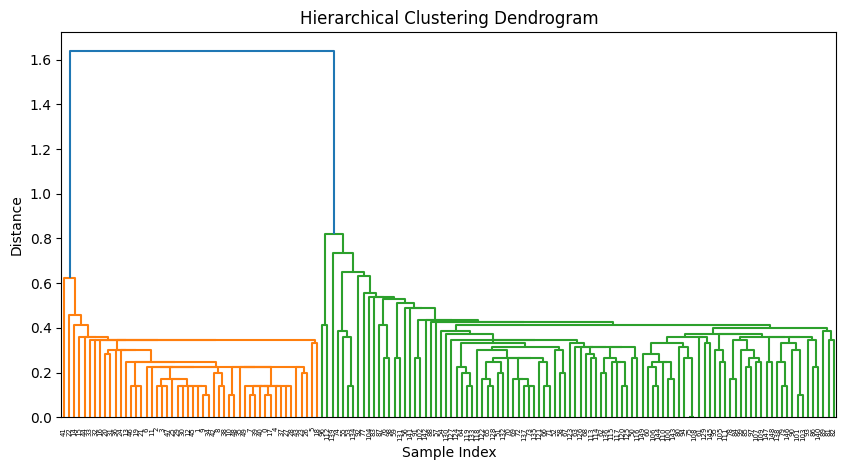

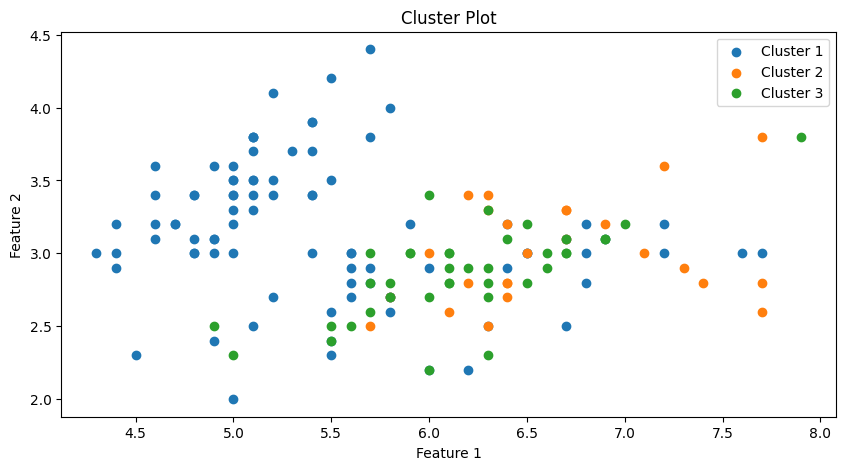

In [19]:
n_clusters = 3  # Number of clusters
clusters = dianaED(data, n_clusters)

# Plot dendrogram
plot_dendrogram(data, clusters)

# Plot clusters
plot_clusters(data, clusters)

# Manhattan Distance

In [20]:
def diana(data, n_clusters):
    # Calculate the dissimilarity matrix using Manhattan distance
    dissimilarity = squareform(pdist(data, metric='cityblock'))  # Manhattan distance

    clusters = [list(range(len(data)))]
    centroids = [np.mean(data[clusters[0]], axis=0)]  # Initialize the centroid of the first cluster

    while len(clusters) < n_clusters:
        # Find the cluster with the maximum diameter
        max_diameter_cluster_index = np.argmax([np.max(dissimilarity[cluster][:, cluster]) for cluster in clusters])
        max_diameter_cluster = clusters[max_diameter_cluster_index]

        # Find the most dissimilar element in the cluster
        most_dissimilar_element_index = np.argmax(np.mean(dissimilarity[max_diameter_cluster][:, max_diameter_cluster], axis=1))
        most_dissimilar_element = max_diameter_cluster[most_dissimilar_element_index]

        # Split the cluster
        new_cluster = [most_dissimilar_element]
        remaining_cluster = [element for element in max_diameter_cluster if element != most_dissimilar_element]

        # Move elements to the new cluster if they are more similar to it
        for element in remaining_cluster:
            if np.mean(dissimilarity[element][new_cluster]) < np.mean(dissimilarity[element][remaining_cluster]):
                remaining_cluster.remove(element)
                new_cluster.append(element)

        # Update the clusters
        clusters[max_diameter_cluster_index] = remaining_cluster
        clusters.append(new_cluster)

        # Calculate and print the new centroids if they have changed
        new_centroids = [np.mean(data[cluster], axis=0) for cluster in clusters]
        print(f"Centroid: {new_centroids}")
        centroids = new_centroids
        
    # Calculate silhouette score
    labels = np.zeros(len(data))
    for i, cluster in enumerate(clusters):
        labels[cluster] = i
    silhouette = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette}")

    return clusters

def plot_dendrogram(data, clusters):
    # Concatenate data points from clusters
    clustered_data = np.concatenate([data[cluster] for cluster in clusters])

    # Compute linkage matrix
    linkage_matrix = linkage(clustered_data, 'single')

    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

def plot_clusters(data, clusters):
    # Plot clusters
    plt.figure(figsize=(10, 5))
    for i, cluster in enumerate(clusters):
        plt.scatter(data[cluster][:, 0], data[cluster][:, 1], label=f'Cluster {i+1}')
    plt.title('Cluster Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


Centroid: [array([5.6832, 3.068 , 3.3712, 1.0168]), array([6.644, 3.004, 5.692, 2.112])]
Centroid: [array([5.46896552, 3.15402299, 2.81954023, 0.79425287]), array([6.644, 3.004, 5.692, 2.112]), array([6.17368421, 2.87105263, 4.63421053, 1.52631579])]
Silhouette Score: 0.11437719643738878


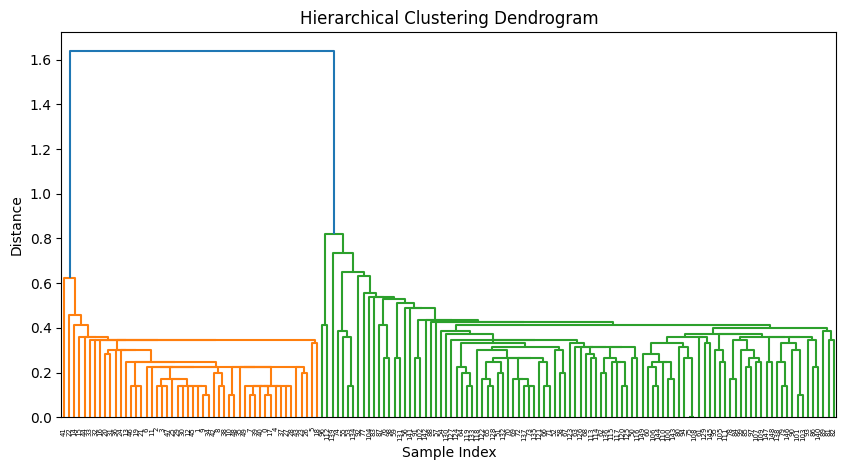

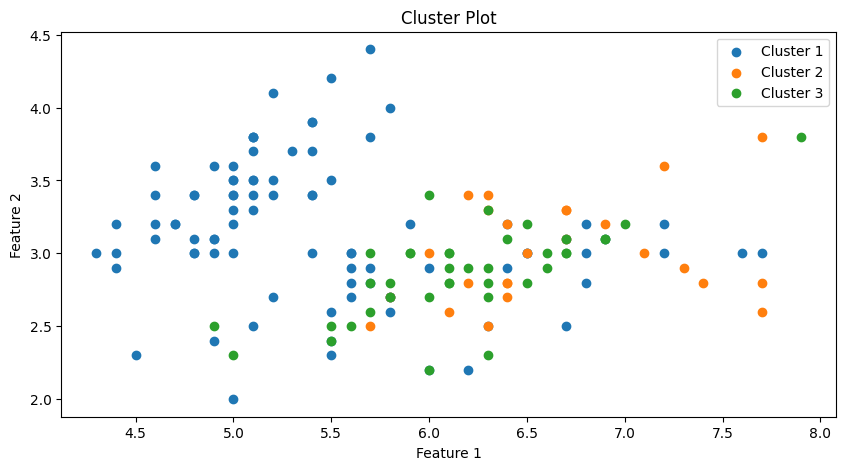

In [21]:
n_clusters = 3  # Number of clusters
clusters = diana(data, n_clusters)

# Plot dendrogram
plot_dendrogram(data, clusters)

# Plot clusters
plot_clusters(data, clusters)


# B) Agglomerative Nesting

# Euclidean distance

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The average silhouette_score is : 0.5543236611296419


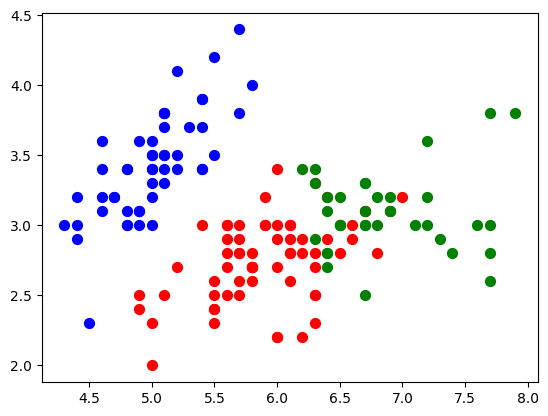

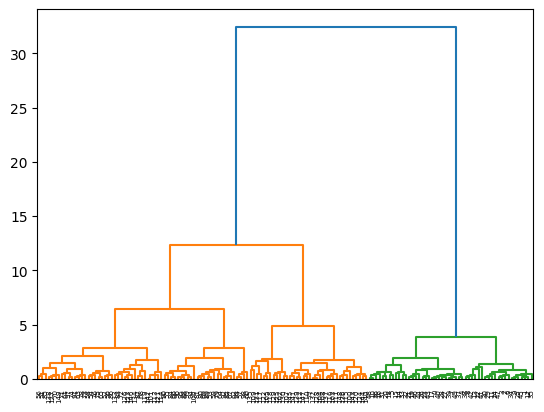

In [22]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Define the model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model and predict the clusters
model.fit(X)
labels = model.labels_

silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the clusters
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

# Create a dendrogram
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()


# Manhattan Distance

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The average silhouette_score is : 0.5535372928319979


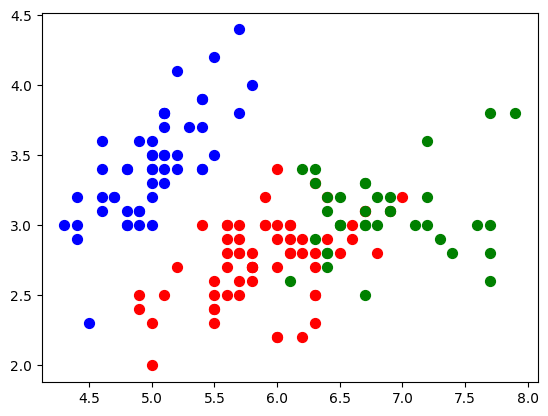

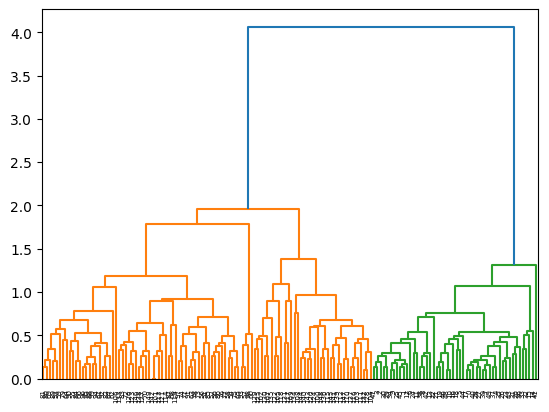

In [23]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Define the model
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')

# Fit the model and predict the clusters
model.fit(X)
labels = model.labels_

silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the clusters
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

# Create a dendrogram
linked = linkage(X, 'average')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()


# Mahalanobis Distance

/tmp/ipykernel_18/2450446544.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='average')


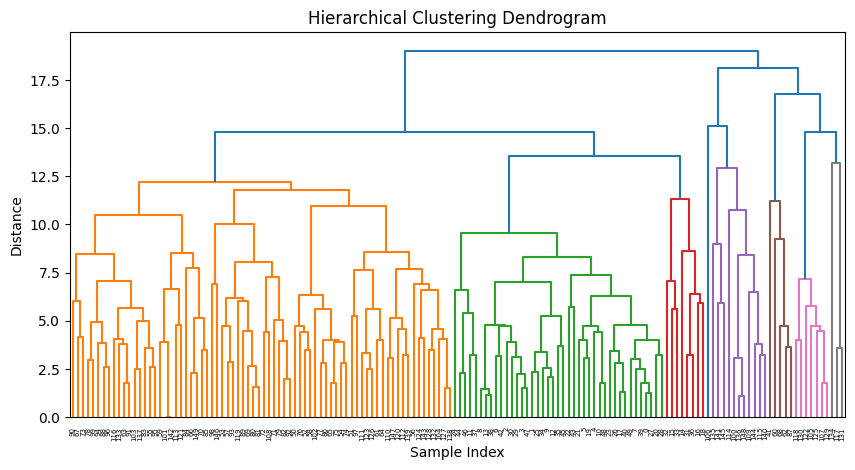

The average silhouette_score is : -0.026104658588592077


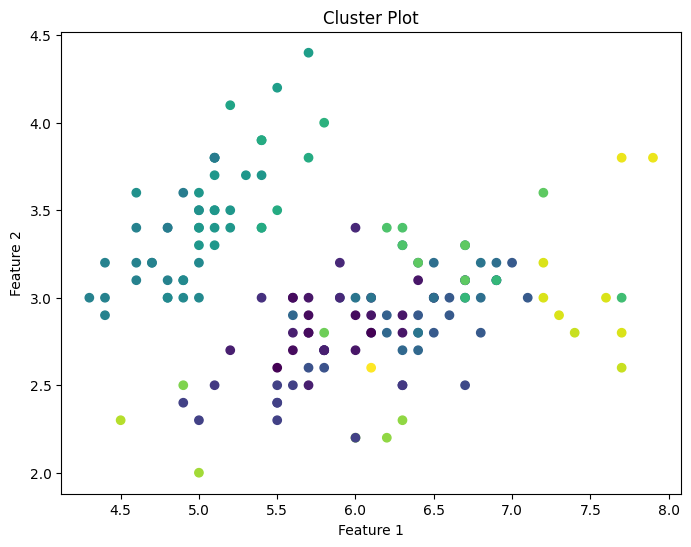

In [24]:
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# Load the iris dataset
iris = load_iris()
X = iris.data

# Compute the inverse of the covariance matrix
V = np.cov(X, rowvar=False)
VI = np.linalg.inv(V)

# Compute the Mahalanobis distance
dist_matrix = squareform(pdist(X, metric='mahalanobis', VI=VI))

# Perform hierarchical clustering
Z = linkage(dist_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Determine the number of clusters based on the dendrogram
threshold = 7  # Adjust the threshold as needed
labels = fcluster(Z, threshold, criterion='distance')

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Density-based Approach

# DBSACN

Silhouette Score (euclidean): 0.36
Silhouette Score (manhattan): -0.21
Silhouette Score (chebyshev): 0.51
Silhouette Score (mahalanobis): 0.05
Silhouette Score (hamming): 0.08


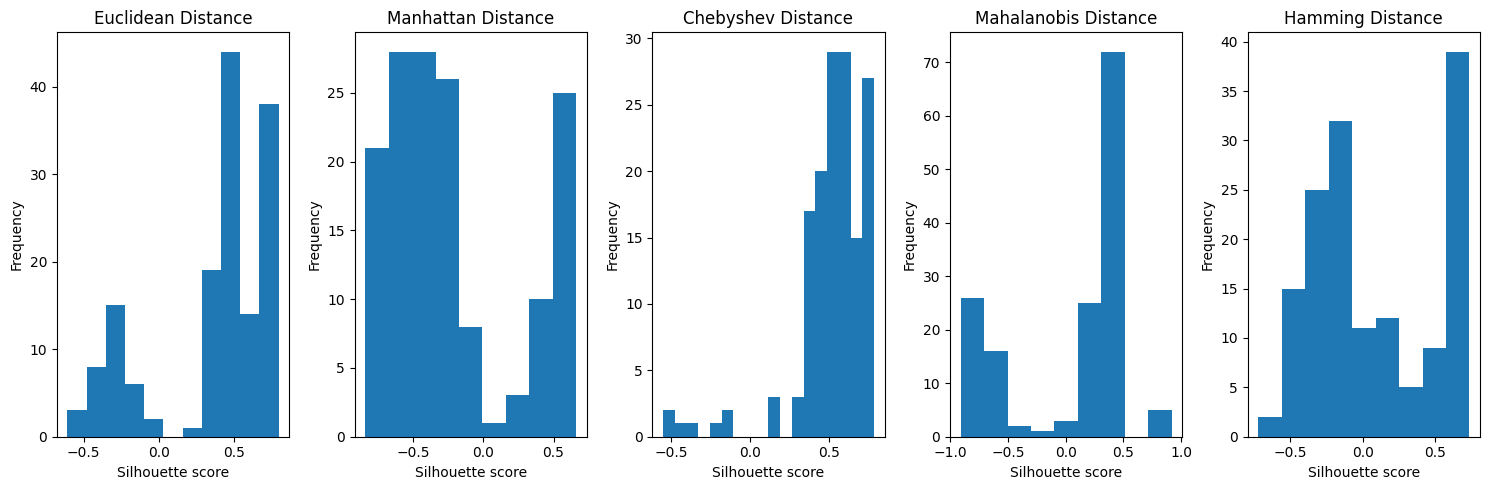

In [25]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'mahalanobis', 'hamming']

# Initialize DBSCAN models with different distance metrics
dbscan_models = {}
for metric in metrics:
    if metric == 'mahalanobis':
        cov_matrix = np.cov(X_scaled, rowvar=False)
        dbscan = DBSCAN(eps=0.5, min_samples=5, metric=metric, metric_params={'V': cov_matrix})
    else:
        dbscan = DBSCAN(eps=0.5, min_samples=5, metric=metric)
    dbscan.fit(X_scaled)
    dbscan_models[metric] = dbscan

# Plot histograms of silhouette scores for each metric
fig, axs = plt.subplots(1, len(metrics), figsize=(15, 5))

for i, metric in enumerate(metrics):
    dbscan = dbscan_models[metric]
    labels = dbscan.labels_

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score ({metric}): {silhouette_avg:.2f}')

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, labels)

    # Create histogram
    axs[i].hist(sample_silhouette_values, bins='auto')
    axs[i].set_title(f'{metric.capitalize()} Distance')
    axs[i].set_xlabel('Silhouette score')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()